Filtering exercise: exam scores are X ~ U(0, 100), and the passing score is 60. So. A = [60, 100]. Hence, p_success = 0.4. Define Z = X_T to be the first pass. What is distribution and expected value of Z?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_trials = 10**6  # simulation length
passing_score = 60
total_points = 100
p = (total_points - passing_score)/total_points  # probability of passing the exam


# Generate scores until first pass
T_samples = []
Z_samples = []




Make a loop over n_trials and compute the estimates

In [2]:
for i in range(n_trials):
    t = 1
    while 1:
        x = np.random.uniform(0, 100)
        if x >= passing_score: 
            Z_samples.append(x)
            T_samples.append(t)
            break
        t += 1

#T_samples = np.array(T_samples)
#Z_samples = np.array(Z_samples)

# Theoretical 
E_T_theory = 1 / p
Var_T_theory = (1 - p) / (p**2)
E_Z_theory = (passing_score + total_points) / 2  # mean of Uniform(60,100)

#Simulation
E_T_sim = np.mean(T_samples)
E_Z_sim = np.mean(Z_samples)


print("Expectation of T (theory):", E_T_theory)
print("Expectation of T (sim):   ", E_T_sim)
print("Variance of T (theory):  ", Var_T_theory)
print("Variance of T (sim):     ", np.var(T_samples))

print("\nExpectation of Z (theory):", E_Z_theory)
print("Expectation of Z (sim):   ", E_Z_sim)

Expectation of T (theory): 2.5
Expectation of T (sim):    2.501016
Variance of T (theory):   3.749999999999999
Variance of T (sim):      3.7619129677440006

Expectation of Z (theory): 80.0
Expectation of Z (sim):    79.98231146599498


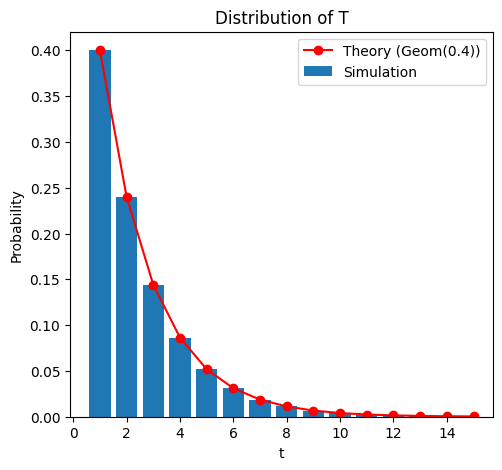

In [3]:
# Distribution of T
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
max_t = 15
counts, bins = np.histogram(T_samples, bins=np.arange(1, max_t+1),  density=True)
plt.bar(bins[:-1], counts, label="Simulation")

# Theoretical pmf
t_vals = np.arange(1, max_t+1)
plt.plot(t_vals, (1-p)**(t_vals-1)*p, 'ro-', label="Theory (Geom(0.4))")
plt.title("Distribution of T")
plt.xlabel("t")
plt.ylabel("Probability")
plt.legend()




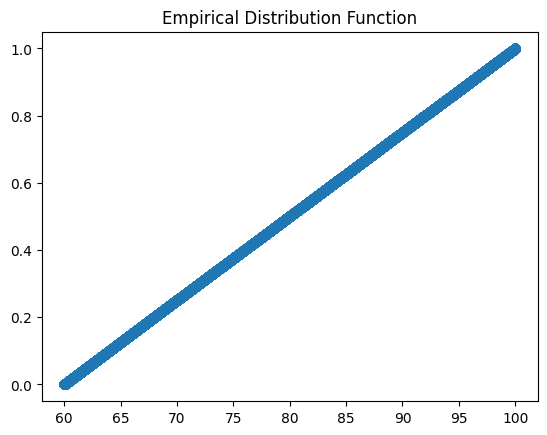

In [ ]:
#from utils import makeEDF, plotEDF
#Z_edf = makeEDF(Z_samples)
#plotEDF(Z_edf)
#Z_edf



In [5]:
Z_samples

[74.92023339780484,
 81.48401663452026,
 91.27213278708645,
 69.4416107947582,
 90.62867715127877,
 64.68974571123202,
 82.32802549078895,
 79.81929071541693,
 63.81952762008088,
 67.32156973059307,
 68.46668076595604,
 77.57884392593843,
 74.36661578083783,
 68.36372443778241,
 71.56508043974063,
 98.77467673344678,
 85.89110058387178,
 84.98859322563094,
 68.90481006859666,
 99.29691670794267,
 85.79718239258476,
 88.82706249252014,
 91.3054917590756,
 91.0877889029935,
 80.45344530050073,
 65.97859304713836,
 90.34494112212647,
 75.46168950895736,
 74.13284021698288,
 60.11583292955559,
 79.73047073661444,
 88.97687925648887,
 94.595418867194,
 95.47647502267394,
 79.50963269445595,
 72.85342392221501,
 66.39215964853526,
 77.95778475203056,
 97.10120861449205,
 80.15298993422452,
 77.08769733988817,
 98.45034998708839,
 61.623055632487876,
 60.67226607263453,
 71.16383973832524,
 63.096792539065994,
 69.31993668847244,
 79.20955157591848,
 86.43518669526247,
 88.06461477516886,
 91

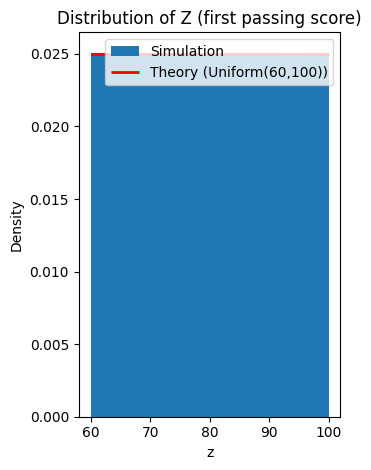

In [12]:
# Distribution of Z
plt.subplot(1,2,2)
plt.hist(Z_samples, density=True, label="Simulation")
plt.hlines(1/(total_points - passing_score), passing_score, total_points, colors='r', lw=2, label="Theory (Uniform(60,100))")
plt.title("Distribution of Z (first passing score)")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

(array([0.02503507, 0.02522407, 0.02495857, 0.02490832, 0.02502282,
        0.02501107, 0.02497657, 0.02491582, 0.02487157, 0.02507682]),
 array([60.00005911, 64.00004742, 68.00003573, 72.00002405, 76.00001236,
        80.00000068, 83.99998899, 87.99997731, 91.99996562, 95.99995393,
        99.99994225]),
 <BarContainer object of 10 artists>)

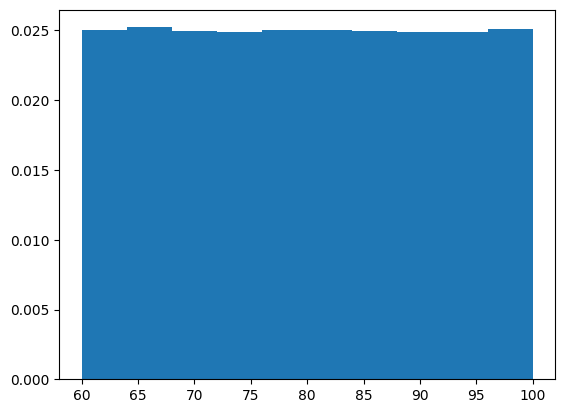

In [11]:
plt.hist(Z_samples, density=True, label="Simulation")